# CI/CD for a Kubeflow pipeline on Vertex AI

In [ ]:
PROJECT_ID = !(gcloud config get-value project)
PROJECT_ID = PROJECT_ID[0]
REGION = "us-central1"
ARTIFACT_STORE = f"gs://{PROJECT_ID}-kfp-artifact-store"

In [ ]:
PROJECT_ID

In [ ]:
!gsutil ls | grep ^{ARTIFACT_STORE}/$ || gsutil mb -l {REGION} {ARTIFACT_STORE}

In [ ]:
pwd

In [ ]:
!cat detect_llm_vertex_trainer/Dockerfile

In [ ]:
!cat kfp-cli-vertex/Dockerfile

In [ ]:
KFP_CLI_IMAGE_NAME = "kfp-cli-vertex"
KFP_CLI_IMAGE_URI = f"gcr.io/{PROJECT_ID}/{KFP_CLI_IMAGE_NAME}:latest"
KFP_CLI_IMAGE_URI

In [42]:
!gcloud builds submit --timeout 15m --tag {KFP_CLI_IMAGE_URI} kfp-cli-vertex

Creating temporary tarball archive of 4 file(s) totalling 2.4 KiB before compression.
Uploading tarball of [kfp-cli-vertex] to [gs://detect-llm-cicd_cloudbuild/source/1704198764.1374-ccf4517aa91b41ccb2c327b6966faa87.tgz]
Created [https://cloudbuild.googleapis.com/v1/projects/detect-llm-cicd/locations/global/builds/8abc360d-ff6b-400a-b541-9b27fb9a2f77].
Logs are available at [ https://console.cloud.google.com/cloud-build/builds/8abc360d-ff6b-400a-b541-9b27fb9a2f77?project=707071482974 ].
----------------------------- REMOTE BUILD OUTPUT ------------------------------
starting build "8abc360d-ff6b-400a-b541-9b27fb9a2f77"

FETCHSOURCE
Fetching storage object: gs://detect-llm-cicd_cloudbuild/source/1704198764.1374-ccf4517aa91b41ccb2c327b6966faa87.tgz#1704198765428532
Copying gs://detect-llm-cicd_cloudbuild/source/1704198764.1374-ccf4517aa91b41ccb2c327b6966faa87.tgz#1704198765428532...
/ [1 files][  1.1 KiB/  1.1 KiB]                                                
Operation completed over 

In [ ]:
pwd

In [ ]:
SUBSTITUTIONS = f"_REGION={REGION},_PIPELINE_FOLDER=./"
SUBSTITUTIONS

In [ ]:
!gcloud services enable aiplatform.googleapis.com

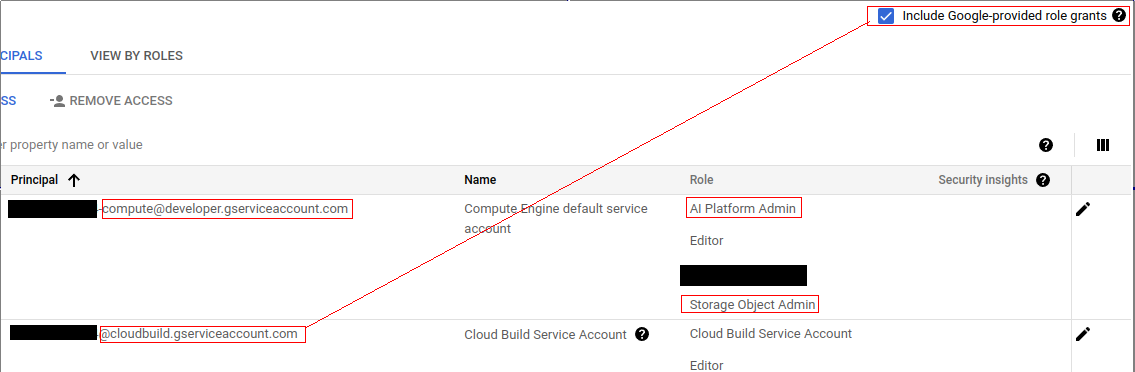

In [ ]:
%%bash
PROJECT_ID=$(gcloud config get-value project)
PROJECT_NUMBER=$(gcloud projects list --filter="name=$PROJECT_ID" --format="value(PROJECT_NUMBER)")

gcloud projects add-iam-policy-binding $PROJECT_ID \
  --member serviceAccount:$PROJECT_NUMBER@cloudbuild.gserviceaccount.com \
  --role roles/editor
gcloud projects add-iam-policy-binding $PROJECT_ID \
    --member serviceAccount:$PROJECT_NUMBER-compute@developer.gserviceaccount.com \
    --role roles/storage.objectAdmin

In [ ]:
!gcloud builds submit . --config cloudbuild_vertex.yaml --substitutions {SUBSTITUTIONS}

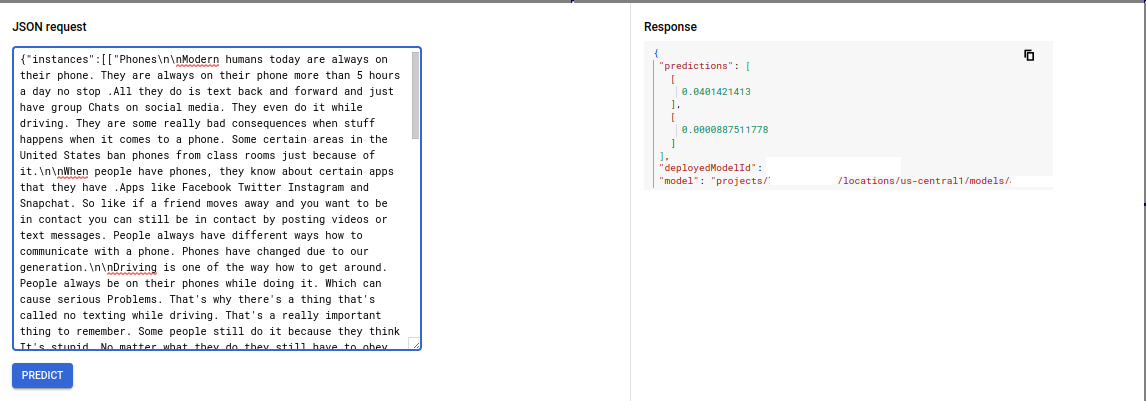